In [1]:
# Import dependencies
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in csv data and turn into DFs
csv_file = "2006.csv"
csv_file_2 = "Team Stats 2003 - 2018.csv"
stats_df = pd.read_csv(csv_file_2)
teams_df = pd.read_csv(csv_file)

In [3]:
# LC to use in the loop below so I can easily read in all files in one fail swoop without having to do it one by one
years_suffix = [x for x in range(7, 17)]


# Read in the rest of the CSV files and update the years to point to the next CSV file
for i in years_suffix:
    if i > 9:
        csv_file = (f"20{i}.csv")
    else:
        csv_file = (f"200{i}.csv")
    
    # Turn new file into DF and concat(stack) it onto the teams df to combine all the data
    new_df = pd.read_csv(csv_file)
    teams_df = pd.concat([teams_df, new_df], sort = False, ignore_index = True)
  

In [4]:
# Reassign the complete teams_df to a new variable using a copy for later use
full_teams_df = teams_df.copy()

# Check my counts to make sure everything was combined correctly
full_teams_df.count()

Tm              330
Attendance      330
Attend/G        330
BatAge          330
PAge            330
BPF             330
PPF             330
#HOF            330
#A-S            330
#a-tA-S         330
Est. Payroll    330
Time            330
Managers        330
Chall            90
Succ             90
Succ%            90
dtype: int64

In [5]:
# Empty list for use below
year_team_list = []

# Set my counters for the loop
counter = 0
year = 2006

# loop through my team names and add the appropriate year so that they match the 
# team names in the "Team Stats" file we read in at the top of the algo
for team in full_teams_df["Tm"]:
    
    yr_tm = f"{year} {team}"
    year_team_list.append(yr_tm)
    counter += 1
    
    if counter == 30:
        year += 1
        counter = 0
        
# Check list to make sure it updated correctly        
year_team_list

['2006 ARI',
 '2006 ATL',
 '2006 BAL',
 '2006 BOS',
 '2006 CHC',
 '2006 CHW',
 '2006 CIN',
 '2006 CLE',
 '2006 COL',
 '2006 DET',
 '2006 FLA',
 '2006 HOU',
 '2006 KCR',
 '2006 LAA',
 '2006 LAD',
 '2006 MIL',
 '2006 MIN',
 '2006 NYM',
 '2006 NYY',
 '2006 OAK',
 '2006 PHI',
 '2006 PIT',
 '2006 SDP',
 '2006 SEA',
 '2006 SFG',
 '2006 STL',
 '2006 TBD',
 '2006 TEX',
 '2006 TOR',
 '2006 WSN',
 '2007 ARI',
 '2007 ATL',
 '2007 BAL',
 '2007 BOS',
 '2007 CHC',
 '2007 CHW',
 '2007 CIN',
 '2007 CLE',
 '2007 COL',
 '2007 DET',
 '2007 FLA',
 '2007 HOU',
 '2007 KCR',
 '2007 LAA',
 '2007 LAD',
 '2007 MIL',
 '2007 MIN',
 '2007 NYM',
 '2007 NYY',
 '2007 OAK',
 '2007 PHI',
 '2007 PIT',
 '2007 SDP',
 '2007 SEA',
 '2007 SFG',
 '2007 STL',
 '2007 TBD',
 '2007 TEX',
 '2007 TOR',
 '2007 WSN',
 '2008 ARI',
 '2008 ATL',
 '2008 BAL',
 '2008 BOS',
 '2008 CHC',
 '2008 CHW',
 '2008 CIN',
 '2008 CLE',
 '2008 COL',
 '2008 DET',
 '2008 FLA',
 '2008 HOU',
 '2008 KCR',
 '2008 LAA',
 '2008 LAD',
 '2008 MIL',
 '2008 MIN',

In [6]:
# Add above list to my full_teams_df and check the data
full_teams_df["YearTeam"] = year_team_list
full_teams_df.head()

,Tm,Attendance,Attend/G,BatAge,PAge,BPF,PPF,#HOF,#A-S,#a-tA-S,Est. Payroll,Time,Managers,Chall,Succ,Succ%,YearTeam
0,ARI,2091685,25823,29.7,28.8,105,105,0,1,14,$59984226,2:52,Melvin,NaN,NaN,NaN,2006 ARI
1,ATL,2550524,31488,27.5,29.4,100,99,2,3,12,$90156876,2:50,Cox,NaN,NaN,NaN,2006 ATL
2,BAL,2153139,26582,30.4,27.9,99,99,0,1,9,$72585582,2:53,Perlozzo,NaN,NaN,NaN,2006 BAL
3,BOS,2930588,36180,30.5,31.1,105,104,0,4,18,$120099824,3:08,Francona,NaN,NaN,NaN,2006 BOS
4,CHC,3123215,38558,28.6,28.0,103,103,1,1,13,$94424499,2:50,Baker,NaN,NaN,NaN,2006 CHC


In [7]:
# Filter the full_teams_df down to the colums I need
filtered_full_teams_df = full_teams_df[["YearTeam", "Tm", "Attendance", "Attend/G"]]
filtered_full_teams_df.head()

,YearTeam,Tm,Attendance,Attend/G
0,2006 ARI,ARI,2091685,25823
1,2006 ATL,ATL,2550524,31488
2,2006 BAL,BAL,2153139,26582
3,2006 BOS,BOS,2930588,36180
4,2006 CHC,CHC,3123215,38558


In [8]:
# LC to create a better formatted W/L percentage column
percent_convert = [round(x * 100) for x in stats_df["W-L%"]]

# Add the updated column to my stats_df and check DF
stats_df["W-L Rounded"] = percent_convert

stats_df.head()

,YearTeam,RA/G,DefEff,E,DP,W,L,W-L%,ERA,tSho,...,SB,SO 1,BA,OBP,SLG,GDP,LOB,salary,WAR,W-L Rounded
0,2009 ARI,4.83,0.683,124,133,70,92,0.432,4.42,12,...,102,1298,0.253,0.324,0.418,93,1173,73516666,26.3,43
1,2009 ATL,3.96,0.686,96,159,86,76,0.531,3.57,10,...,58,1064,0.263,0.339,0.405,142,1223,96726166,42.4,53
2,2009 BAL,5.41,0.680,90,151,64,98,0.395,5.15,3,...,76,1013,0.268,0.332,0.415,131,1160,67101666,22.4,40
3,2009 BOS,4.54,0.678,82,121,95,67,0.586,4.35,11,...,126,1120,0.270,0.352,0.454,137,1210,121745999,50.8,59
4,2009 CHC,4.17,0.698,105,144,83,78,0.516,3.84,8,...,56,1185,0.255,0.332,0.407,134,1209,134809000,34.5,52


In [9]:
# Merge my two DFs together on the now identical "YearTeam" column since they are now the same format_
# per my changes to the full_teams_df above
merged_team_stats_df = pd.merge(filtered_full_teams_df, stats_df, how = "outer", on= ["YearTeam"])
merged_team_stats_df_cleaned = merged_team_stats_df.dropna()
merged_team_stats_df_cleaned.count()

YearTeam       330
Tm             330
Attendance     330
Attend/G       330
RA/G           330
DefEff         330
E              330
DP             330
W              330
L              330
W-L%           330
ERA            330
tSho           330
H              330
ER             330
HR             330
BB             330
SO             330
R/G            330
R              330
H1             330
RBI            330
SB             330
SO 1           330
BA             330
OBP            330
SLG            330
GDP            330
LOB            330
salary         330
WAR            330
W-L Rounded    330
dtype: int64

In [10]:
# Check my data types to make sure I won't run into any problems with_
# any plotting or calculations below
merged_team_stats_df_cleaned.dtypes

YearTeam        object
Tm              object
Attendance     float64
Attend/G       float64
RA/G           float64
DefEff         float64
E                int64
DP               int64
W                int64
L                int64
W-L%           float64
ERA            float64
tSho             int64
H                int64
ER               int64
HR               int64
BB               int64
SO               int64
R/G            float64
R                int64
H1               int64
RBI              int64
SB               int64
SO 1             int64
BA             float64
OBP            float64
SLG            float64
GDP              int64
LOB              int64
salary           int64
WAR            float64
W-L Rounded      int64
dtype: object

In [11]:
# Print head of mearged DF to check it and have an easily accessible reference 
merged_team_stats_df_cleaned.head()

,YearTeam,Tm,Attendance,Attend/G,RA/G,DefEff,E,DP,W,L,...,SB,SO 1,BA,OBP,SLG,GDP,LOB,salary,WAR,W-L Rounded
0,2006 ARI,ARI,2091685.0,25823.0,4.86,0.685,104,172,76,86,...,76,965,0.267,0.331,0.424,136,1166,59684226,30.2,47
1,2006 ATL,ATL,2550524.0,31488.0,4.97,0.686,99,146,79,83,...,52,1169,0.270,0.337,0.455,131,1105,90156876,32.4,49
2,2006 BAL,BAL,2153139.0,26582.0,5.55,0.678,102,156,70,92,...,121,878,0.277,0.339,0.424,145,1177,72585582,25.4,43
3,2006 BOS,BOS,2930588.0,36180.0,5.09,0.679,66,174,86,76,...,51,1056,0.269,0.351,0.435,136,1301,120099824,37.6,53
4,2006 CHC,CHC,3123215.0,38558.0,5.15,0.698,106,122,66,96,...,121,928,0.268,0.319,0.422,135,1082,94424499,20.1,41


In [12]:
# Reduce my merged df to just the columns I will need for my visualizations later
merged_team_stats_df_cleaned_final = merged_team_stats_df_cleaned[["YearTeam", "Tm", "Attendance", 
                                                                   "Attend/G", "W", "L", "W-L%", "W-L Rounded"]]

# Check the merged_team_stats_df_cleaned_final DF
merged_team_stats_df_cleaned_final.head()

,YearTeam,Tm,Attendance,Attend/G,W,L,W-L%,W-L Rounded
0,2006 ARI,ARI,2091685.0,25823.0,76,86,0.469,47
1,2006 ATL,ATL,2550524.0,31488.0,79,83,0.488,49
2,2006 BAL,BAL,2153139.0,26582.0,70,92,0.432,43
3,2006 BOS,BOS,2930588.0,36180.0,86,76,0.531,53
4,2006 CHC,CHC,3123215.0,38558.0,66,96,0.407,41


In [13]:
# Create cleaner merged table for use in the correlation matrix further below
merged_team_stats_df_dropped = merged_team_stats_df_cleaned_final.drop(columns=["W-L Rounded"])

# Check DF
merged_team_stats_df_dropped.head()

,YearTeam,Tm,Attendance,Attend/G,W,L,W-L%
0,2006 ARI,ARI,2091685.0,25823.0,76,86,0.469
1,2006 ATL,ATL,2550524.0,31488.0,79,83,0.488
2,2006 BAL,BAL,2153139.0,26582.0,70,92,0.432
3,2006 BOS,BOS,2930588.0,36180.0,86,76,0.531
4,2006 CHC,CHC,3123215.0,38558.0,66,96,0.407


In [14]:
# Create corrlation variable for use later in my correlation charting
correlations_df = merged_team_stats_df_dropped.corr()

In [15]:
# Function for the magnifying feature in the below correlation matrix
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "16pt")]),
            dict(selector="td",
                 props=[('padding', "1em 1em")]),
            dict(selector="th:hover",
                 props=[("font-size", "25pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '35pt')])
            ]

In [16]:
# Create colors for correlation mapping 
cmap = cmap=sns.diverging_palette(20, 220, as_cmap=True)

# This is a different version I was working on befor I did the hover function. 
# Keeping these lines in for reference in case I decide to change my chart later 
#cmap = "coolwarm"
#pretty_correlation = correlations_df.style.background_gradient(cmap=cmap)

# Creat and print my correlation mapping
pretty_correlation_2 = correlations_df.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '16pt'})\
    .set_caption("Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

pretty_correlation_2



,Attendance,Attend/G,W,L,W-L%
Attendance,1,1,0.47,-0.47,0.47
Attend/G,1,1,0.47,-0.47,0.47
W,0.47,0.47,1,-1,1
L,-0.47,-0.47,-1,1,-1
W-L%,0.47,0.47,1,-1,1


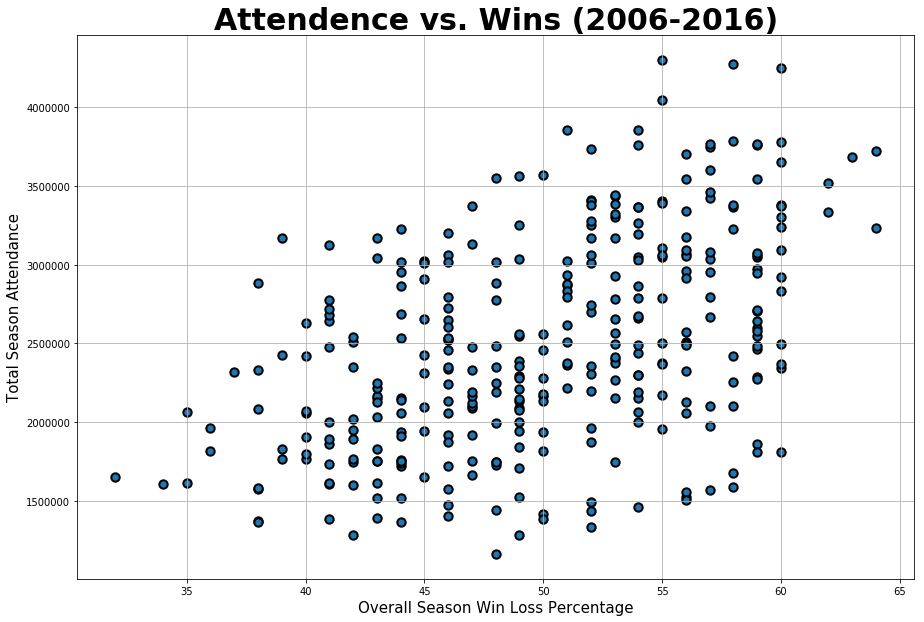

In [17]:
# Attendence vs. Wins (2006-2016) Plot Setup
attend_vs_wins_10yr = merged_team_stats_df_cleaned_final.plot(kind="scatter", 
                                                              x="W-L Rounded", 
                                                              y="Attendance", 
                                                              s=70,
                                                              edgecolors="black", 
                                                              linewidth=2,
                                                              grid=True, 
                                                              figsize=(15,10),        
                                                              )

# Add formatted title and lables
plt.xlabel("Overall Season Win Loss Percentage", fontsize = 15)
plt.ylabel("Total Season Attendance", fontsize = 15)
plt.title("Attendence vs. Wins (2006-2016)", fontsize = 30, fontweight="bold")

# Export picture for the Attendence vs. Wins (2006-2016) Plot to a png file
plt.savefig("output_data/Attendance_vs_Wins_10yr_scatter.png")

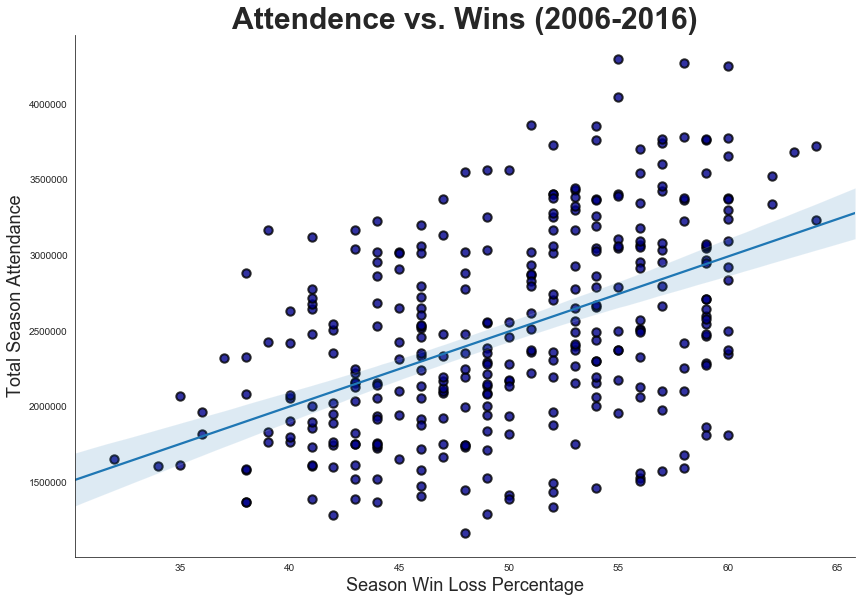

In [18]:
# Create the style for my LOBF Attendence vs. Wins (2006-2016) Plot
# Pretty much same general type of chart as above, just a different style with the line of best fit incorporated...
sns.set_style("white")


# Plot the points and LOBF
attend_vs_wins_10yr_LOBF = sns.lmplot(x="W-L Rounded", 
                                      y="Attendance",
                                      data=merged_team_stats_df_cleaned_final,
                                      height=8,
                                      aspect=1.5,
                                      robust=True,
                                      palette="tab10",
                                      scatter_kws=dict(s=70, linewidth=2, edgecolors="black", color="darkblue"))

# Add formatted title and lables
plt.xlabel("Season Win Loss Percentage", fontsize = 18)
plt.ylabel("Total Season Attendance", fontsize = 18)
plt.title("Attendence vs. Wins (2006-2016)", fontsize = 30, fontweight="bold")


# Export picture the Attendence vs. Wins (2006-2016) Plot to a png file
plt.savefig("output_data/Attendance_vs_Wins_10yr_scatter_LOBF.png")

In [19]:
# Print head of merged_team_stats_df_cleaned_final DF again for quick reference point
merged_team_stats_df_cleaned_final.head()

,YearTeam,Tm,Attendance,Attend/G,W,L,W-L%,W-L Rounded
0,2006 ARI,ARI,2091685.0,25823.0,76,86,0.469,47
1,2006 ATL,ATL,2550524.0,31488.0,79,83,0.488,49
2,2006 BAL,BAL,2153139.0,26582.0,70,92,0.432,43
3,2006 BOS,BOS,2930588.0,36180.0,86,76,0.531,53
4,2006 CHC,CHC,3123215.0,38558.0,66,96,0.407,41


In [20]:
# Groupby object to group the data by team
team_group = merged_team_stats_df_cleaned_final.groupby("Tm")

# Calculations and assignments for my team groupings
avg_attendence_per_game = team_group["Attend/G"].mean()
win_v_loss = team_group["W-L%"].mean()
win_v_loss_rounded = round(team_group["W-L Rounded"].mean())


# Create the teams_grouped_df
teams_grouped_df = pd.DataFrame({"Average Attendance per Game" : avg_attendence_per_game,
                                 "Average Win Loss Percentage" : win_v_loss,
                                 "Average Win Loss Percentage Pretty" : win_v_loss_rounded
                                })

# Reset index and check the teams_grouped_df
teams_grouped_df_reset = teams_grouped_df.reset_index()


teams_grouped_df_reset.head()

,Tm,Average Attendance per Game,Average Win Loss Percentage,Average Win Loss Percentage Pretty
0,ARI,26622.181818,0.477545,48.0
1,ATL,29664.181818,0.508182,51.0
2,BAL,25986.090909,0.477182,48.0
3,BOS,36791.545455,0.538091,54.0
4,CHC,37367.454545,0.493182,49.0


In [21]:
# LC to get the data for my pie chart below
team_lables = [name for name in teams_grouped_df_reset["Tm"]]
avg_attendance_per_game_values = [attendance for attendance in teams_grouped_df_reset["Average Attendance per Game"]]

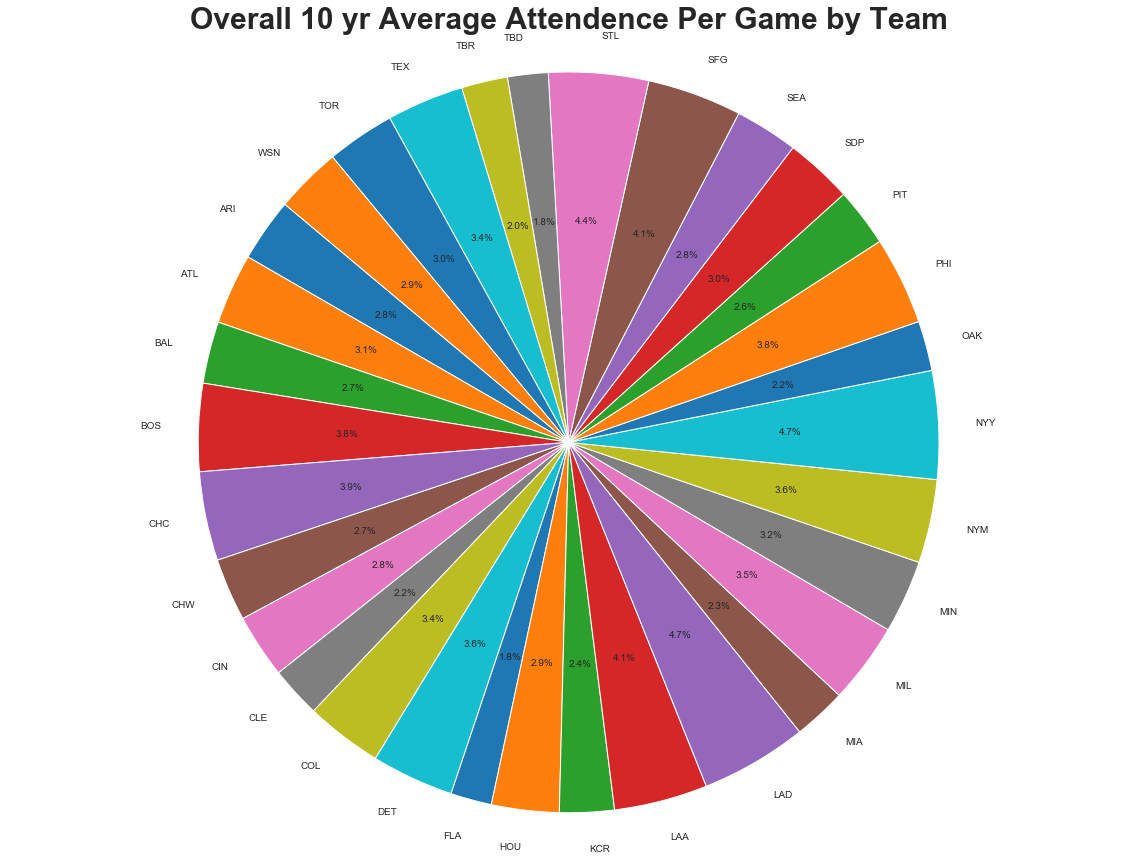

In [22]:
# Set size and Bg color for the pie chart
fig, ax = plt.subplots(facecolor='w', figsize=(20,15))

# Create, format, and plot the Overall Average Attendence Per Game by Team (2006-2016) pie chart
plt.pie(avg_attendance_per_game_values,  labels=team_lables,
        autopct="%1.1f%%", shadow=False, startangle=140)



# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#Create the title for the Overall Average Attendence Per Game by Team (2006-2016) pie chart
plt.title("Overall 10 yr Average Attendence Per Game by Team", fontsize = 30, fontweight="bold")

# Export picture of the Overall Average Attendence Per Game by Team (2006-2016) pie chart to a png file
plt.savefig("output_data/Team_Averages_Pie_Chart.png")

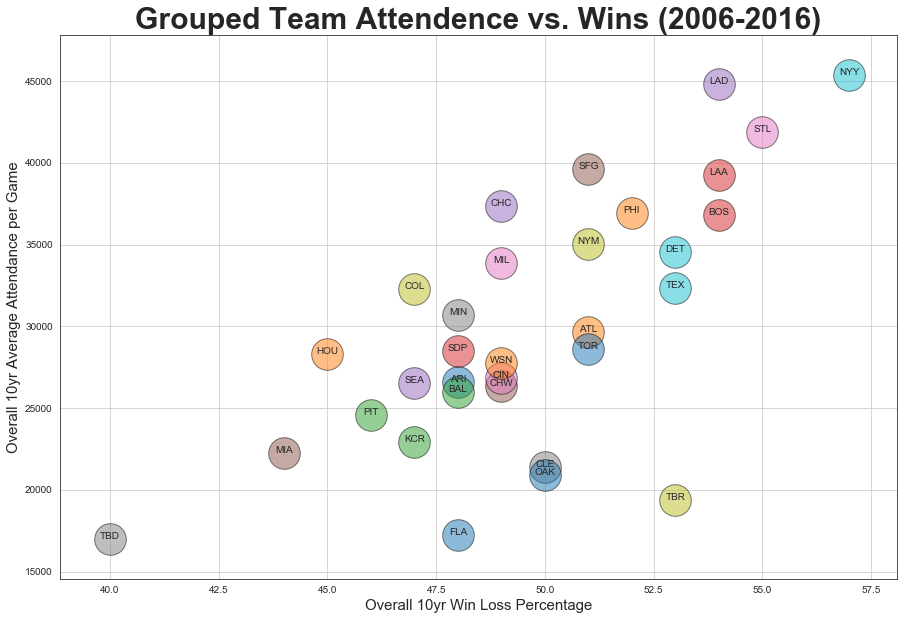

In [23]:
# LCs to gather data for the Grouped Team Attendence vs. Wins (2006-2016)
x = [x for x in teams_grouped_df_reset["Average Win Loss Percentage Pretty"]]
y = [y for y in teams_grouped_df_reset["Average Attendance per Game"]]
teams = [team for team in teams_grouped_df_reset["Tm"]]


# Throw LCs into DF
grouped_team_scatter_df = pd.DataFrame(dict(x=x, y=y,teams=teams))

# Set figure size and Bg color
fig, ax = plt.subplots(facecolor='w', figsize=(15,10))

# Add grid
plt.grid(True)

# Itterate through the grouped_team_scatter_df, plot, and annotate for each team
for key, row in grouped_team_scatter_df.iterrows():
    ax.scatter(row["x"], row["y"], alpha = 0.5, s=1000, edgecolors="black")
    ax.annotate(row["teams"], ha="center", xy = (row["x"], row["y"]))
    
    
# Add formatted title and lables
plt.xlabel("Overall 10yr Win Loss Percentage", fontsize = 15)
plt.ylabel("Overall 10yr Average Attendance per Game", fontsize = 15)
plt.title("Grouped Team Attendence vs. Wins (2006-2016)", fontsize = 30, fontweight="bold")

# Export picture the Grouped Team Attendence vs. Wins (2006-2016) Plot to a png file
plt.savefig("output_data/Grouped_Team_Attendance_vs_Wins_10yr_Scatter.png")